<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[View Source Code](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb) | [View Slides](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/slides/01_pytorch_workflow.pdf) | [Watch Video Walkthrough](https://youtu.be/Z_ikDlimN6A?t=15419) 

# 01. PyTorch Workflow

Let's explore an end-to-end 
Creating first model starts at 5:00

Book version here: https://www.learnpytorch.io/01_pytorch_workflow/

# Setup

In [46]:
what_were_covering = {1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating a model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}

And now let's import what we'll need for this module.

We're going to get torch, torch.nn (nn stands for neural network and this package contains the building blocks for creating neural networks in PyTorch) and matplotlib.

In [2]:
import torch
from torch import nn # nn contains all of PyTorchs' building blocks ´TONS! of reading!!!´
import matplotlib.pyplot as plt

# check pytorch version
print(f"Torch ver= {torch.__version__}, Cuda ver = {torch.version.cuda}") 
print (f"CUDA available = {torch.cuda.is_available()}")
print(f"{torch.cuda.get_device_name(0)}")

Torch ver= 2.5.0, Cuda ver = 12.4
CUDA available = True
NVIDIA GeForce RTX 4070 SUPER


## 1. Data preparing and loading)

Data cn be almost anything
* Excel spreadsheet
* Images of any kind
* Videos (Youtube has lots of data...)
* Audio like songs or podcasts (or my own voice)
* DNA
* Text

Machine learning is a game of two parts:
1. Get data into a numerical representation.
2.   Pick or build a model to learn patterns in that numerical representation

To showcase this, let's create some *known* data using the linear regression formula
   Y= mx + b,  x is the dependent variable m is the slope of the line and b (bias) is the offset from the origin.
   

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0 
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
X[:10],y[:10], X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

### Spliting data into training and test sets. One of the most important concepts in Machine learning
The three data sets
1. Train data (60 -80%)
2. Validation set (pretest)  (10-20%) often but not always used
3. Test set (final exam)  (10-20%)

Let's create a training and test set

In [50]:
# Create a train/test split
train_split = int( 0.8 * len(X))  # 80% for training
X_train, y_train = X[:train_split], y[:train_split] # upto split marker
X_test, y_test = X[train_split:], y[train_split:] # split marker  to end

len( X_train), len( y_train), len( X_test), len( y_test)

(40, 40, 10, 10)

We use a simple splitting approach but https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html uses a more sophisticated way

### How can we best visualize our data?
This is where the data explorers' motto comes in!
Visualize, visualize, visualize

Reference = https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

CPU times: total: 0 ns
Wall time: 0 ns


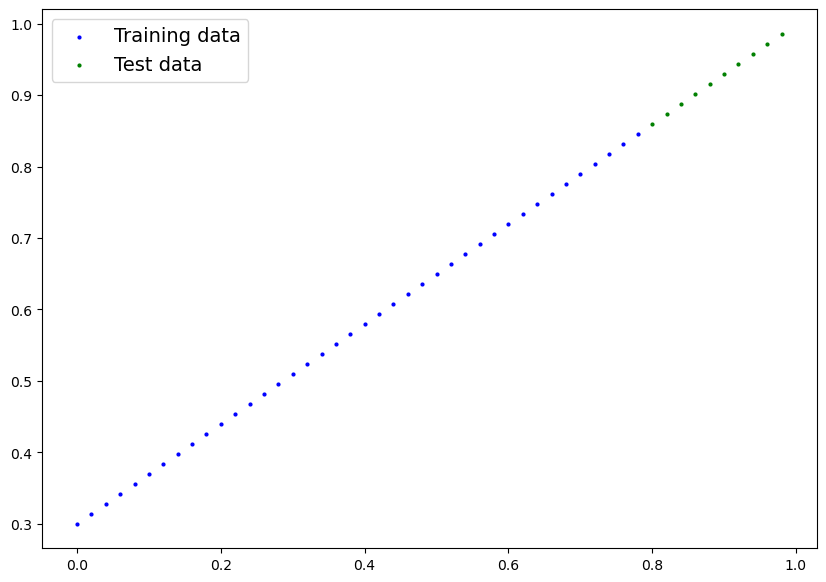

In [51]:
### switch to code to execute
# plt.plot(X, y)
#plt.show()
def plot_predictions( train_data= X_train,
                     train_labels= y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None ):
    %matplotlib inline
    %time
    """
    Plots trainng data, test data and compares predictions
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, color="b", s=4, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, color="g", s=4, label="Test data")

    # Are there predictions?
    if predictions is not None:
        # Plot predictions in red
        plt.scatter(test_data, predictions, color="r", s=4, label="Predictions")
    plt.legend(prop={"size": 14});

plot_predictions()

## 2. Build a model   4:53

Our first pytorch model!

This is very exciting.... let's do it!

Because we're going to be building classes thoughtout the course, I'd recommend getting familiar with OOP in Python. To do so you can use the following resource from Real Python: https://realpython.com/python-classes/

WHat are model does
* Start with random values (weight and bias)
* Look at data and adjust them  to better fit the data we created

How does it work?
Through two main algorithmns
1. gradient descent

3. Backpropagation

Artem Kirsanov
   https://youtu.be/SmZmBKc7Lrs

3blue1brown
      https://youtu.be/IHZwWFHWa-w   https://youtu.be/Ilg3gGewQ5U
   
   Both these channels are excellent at explaining various math and neuro science topics

Using the nn.Parameter to declare these member variables, allows them to be registered  for updates during training phase

In [52]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- nearly all classes are based on Module
    # Modules can also contain other Modules
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                    dtype=torch.float),
                                    requires_grad=True)
        
        self.bias = nn.Parameter(torch.randn(1,
                                    dtype=torch.float),
                                    requires_grad=True)
                           
    # Forward method (required)  to define the computation in the model
    def forward(self, X: torch.Tensor) -> torch.Tensor: # x is the input
        return self.weight * X + self.bias  # linear regression formula we used


> **Resource:**  If you're unfamiliar with Python class notation, I'd recommend reading [Real Python's Object Orientating programming in Python 3 guide](https://realpython.com/python3-object-oriented-programming/) a few times.  See more of these essential modules and their use cases in the [PyTorch Cheat Sheet:]( https://pytorch.org/tutorials/beginner/ptcheat.html)


### PyTorch model building essentials

* [`torch.nn`](https://pytorch.org/docs/stable/nn.html)- contains all of the building blocks for computation graphs (a neural network can be considered a computational graph)
* torch.nn.Parameters - what parameters should try to learn, often a Torch layer from torch.nn will set these for us.
* torch.nn.Module - THe base class for all neural network modules. If you subclass it, you must override the forward function.
* torch.optim - this is where the optimizers in Pytorch live.  THey will help with gradient descent.
* def forward() - all nn.Module subclasses require you to override this function, this function tells the model what to do when forward propagating input data
* torch.utils.data .. dataset and dataloader - handle downloading online datasets, converting them to usable form, and feeding it in reasonable chunks via batches to the model. Torchvision also allows downloading pretrained models as well.  More on this later  and check the pytorch doc: https://pytorch.org/vision/stable/datasets.html

### Checking the contents of our PyTorch model

Now we have created a model, let's sere what is under the hood 5:22

We can check out our model params by using .Paramters()

In [80]:
# Create a manual seed
torch.manual_seed(42)

# Create an instance of our model
model_0 = LinearRegressionModel()

# Check out params
list( model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

We can also get the state (what the model contains) of the model using [`.state_dict()`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html#torch.nn.Module.state_dict).

In [77]:
#List named parameters
def show_state_dict():
    model_0.state_dict()
    #y = None
    for k,y in model_0.state_dict().items():
        print (f"Name: {k}, value: {y}")
    
    print(f"Goal is to achieve these values thru learning")
    print(f"Fixed weight: {weight}, fixed bias: {bias}") 


In [55]:
show_state_dict()

Name: weight, value: tensor([0.3367])
Name: bias, value: tensor([0.1288])
Goal is to achieve these values thru learning
Fixed weight: 0.7, fixed bias: 0.3


### Making predictions using `torch.inference_mode()`

To check our models' predictive power, let's see how well it predicts 'y_test' based on x_test.

When we pass data through our model it's going to run it through the forward() method.

In [56]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test) # looks like an xtor()
#y_preds, y_test

In [57]:
# Check the predictions
print(f"Number of testing samples: {len(X_test)}") 
print(f"Number of predictions made: {len(y_preds)}")
print(f"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])


CPU times: total: 0 ns
Wall time: 0 ns


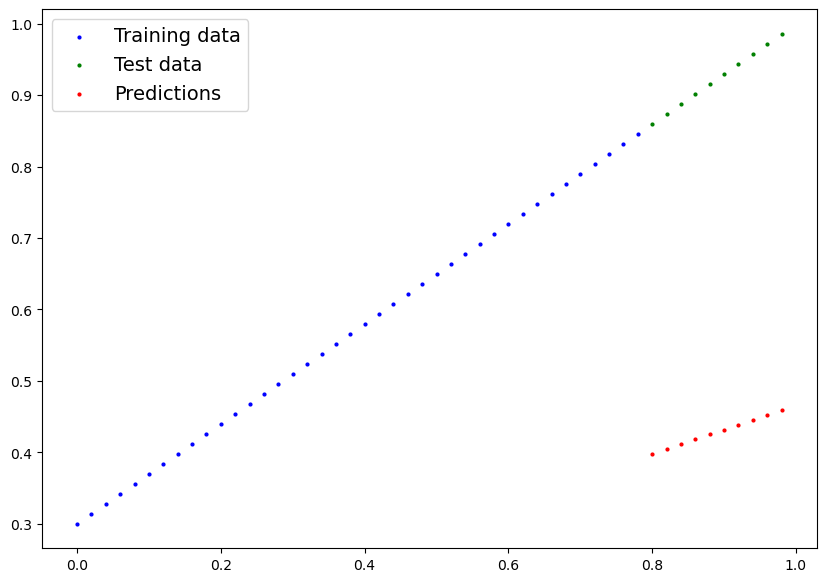

In [58]:
plot_predictions(predictions=y_preds)

In [59]:
y_test - y_preds

tensor([[0.4618],
        [0.4691],
        [0.4764],
        [0.4836],
        [0.4909],
        [0.4982],
        [0.5054],
        [0.5127],
        [0.5200],
        [0.5272]])

## 3. Train model

The whole idea is to tweek the Parameters to better fit the test data

One way to measure how good the predictions are, is to use the loss functions

* Note: Loss function may also be called cost function or criterion in different areas.

Things needed to train

* **Loss function** A function to measure the delta between what is guessed to the expected value.
* **Optimizer** Takes the loss functions' outputs and uses them to adjust the parameters through Backpropagation.  Optimizer starts at the output and walks thought the model in the reverse directing making calculated adjustments by using gradient descent (first or second derivitive) to determine direction and scale of adjustment.

Specifically for PyTorch we need
1. A training loop
2. A testing loop


In [81]:
# Setup a loss function
loss_fcn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr = 0.01
                           #, momentum=0.9   # optional adjustment though not explained
                           ) #  learning rate the most mportant Hparam

# Optional schedulers can be added to dynamically adjust the LR on each epoch
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min') # called in each loop
# scheduler can alo be chained (more than 1 for complex optimizations)
# the next 2 step outsde the for loop per Epoch
#scheduler1 = ExponentialLR(optimizer, gamma=0.9)
#scheduler2 = MultiStepLR(optimizer, milestones=[30,80], gamma=0.1)
#scheduler.step()
#scheduler1.step()
#scheduler2.step()

### Building a training loop and a test loop

couple of things are needed
0. Loop through the data
1. Forward pass - to make predictions (this moves input data through the model)
2. Calculate the loss
3. Optimizer zero grad
4. Loss backwards - move backwards through the model to calculate the gradients of each parameter with respect to the loss **backpropagation**
5. Optimizer step - adjust model params to try to reduce the loss **gradient descent**
6. scheduler step (optional) - Learning rate dynamic adjustments.

In [91]:
torch.manual_seed(42)
# an Epoch is one loop thru the data...
#def train():
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []    

# 0. Loop thru the data
for epoch in range(epochs):

    # set to training mode
    model_0.train() # activates the gradients for all params that require_grad

    # 1.implement forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fcn( y_pred, y_train)

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. loss backwards
    loss.backward()

    # 5. optimizer step
    optimizer.step()
    # 6. scheduler step
    #scheduler.step(loss)
    # set to evaluation mode
    model_0.eval() 

    with torch.inference_mode():
        # 1 forward pass the test data
        test_pred = model_0(X_test)

        # 2. Calculate the loss on test data
        test_loss = loss_fcn(test_pred, y_test.type(torch.float))

        # print out whats's happening
        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss}")

Epoch: 0 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 10 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 20 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 30 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 40 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 50 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 60 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 70 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 80 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882
Epoch: 90 | MAE Train Loss: 0.008932482451200485 | MAE Test Loss: 0.005023092031478882


In [92]:
show_state_dict()

Name: weight, value: tensor([0.6990])
Name: bias, value: tensor([0.3093])
Goal is to achieve these values thru learning
Fixed weight: 0.7, fixed bias: 0.3


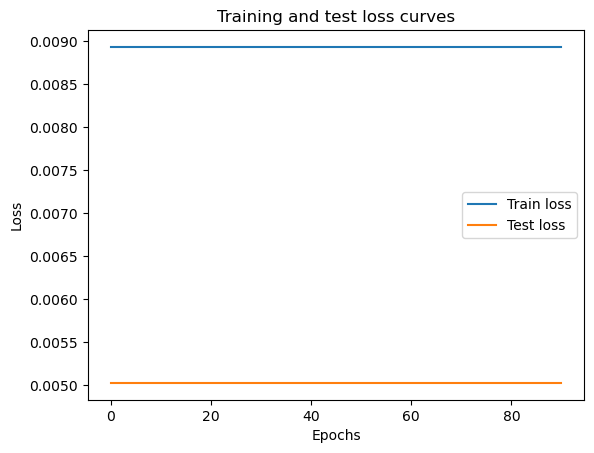

In [93]:
# Plot the loss curves
plt.plot(epoch_count, train_loss_values, label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

## 4. Making prediction with a trained PyTorch model (inference)

Once you've trained a model, you'll likely want to make predictions with it.

We've already seem glimpses of this in the training and testing code above, the steps to do it outside of the training loop are similiar.

There are three things to remember when making predictions (also called performing inference) with a PyTorch model:
1. 
Set the model in evaluation mode (model.eval())2. .
Make the predictions using the inference mode context manager (with torch.inference_mode(): ..
3. ).
All predictions should be made with objects on the same device (e.g. data and model on GPU only or data and model on CPU on
   ly).
The first two items make sure all helpful calculations and settings PyTorch uses behind the scenes during training but aren't necessary for inference are turned off (this results in faster computation). And the third ensures that you won't run into cross-device errors.




In [89]:
# 1. Set to evaluation mode
model_0.eval() 

# 2. Aet up inference mode ith context manager
with torch.inference_mode():
    # 3. Make sure the calculations are done with the model and data on the same device
    # in our case, we haven't setup device-agnostic code yet so our data and model are
    # on the CPU by default.
    # model_0.to(device)
    # X_test = X_test.to(device)
    y_preds = model_0(X_test)
y_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

Nice, We've made some predictions. How do they look?

CPU times: total: 0 ns
Wall time: 0 ns


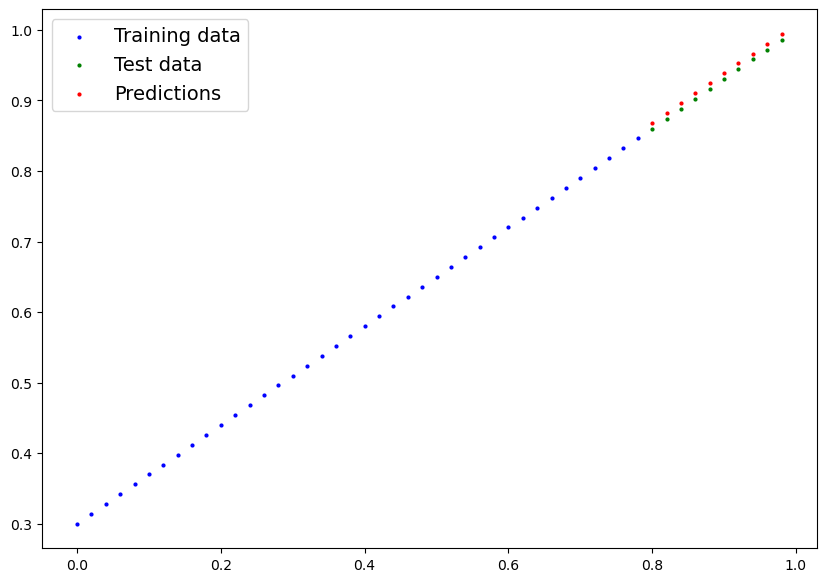

In [95]:
plot_predictions(predictions=y_preds)

## 5. Saving and loading a PyTorch model

If you've trained a model, chances are that you'll want to save it and export it somewhere.

As in, you might train it on Google Colab or your local machine with a GPU but you'd like to now export it to some sort of application where others can use it.

Or maybe you'd like to save your progress on a model and come back and load it back later.

For saving and loading models in PyTorch, there are three main methods you should be aware of (all of below have been taken from the [PyTorch saving and loading models guide](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference)):

| PyTorch method | What does it do? | 
| ----- | ----- |
| [`torch.save`](https://pytorch.org/docs/stable/torch.html?highlight=save#torch.save) | Saves a serialized object to disk using Python's [`pickle`](https://docs.python.org/3/library/pickle.html) utility. Models, tensors and various other Python objects like dictionaries can be saved using `torch.save`.  | 
| [`torch.load`](https://pytorch.org/docs/stable/torch.html?highlight=torch%20load#torch.load) | Uses `pickle`'s unpickling features to deserialize and load pickled Python object files (like models, tensors or dictionaries) into memory. You can also set which device to load the object to (CPU, GPU etc). |
| [`torch.nn.Module.load_state_dict`](https://pytorch.org/docs/stable/generated/torch.nn.Module.html?highlight=load_state_dict#torch.nn.Module.load_state_dict)| Loads a model's parameter dictionary (`model.state_dict()`) using a saved `state_dict()` object. |

> **Note:** As stated in [Python's `pickle` documentation](https://docs.python.org/3/library/pickle.html), the `pickle` module **is not secure**. That means you should only ever unpickle (load) data you trust. That goes for loading PyTorch models as well. Only ever use saved PyTorch models from sources you trust.r.

### Saving a PyTorch model's `state_dict()`

The [recommended way](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference) for saving and loading a model for inference (making predictions) is by saving and loading a model's `state_dict()`.

Let's see how we can do that in a few steps:

1. We'll create a directory for saving models to called `models` using Python's `pathlib` module.
2. We'll create a file path to save the model to.
3. We'll call `torch.save(obj, f)` where `obj` is the target model's `state_dict()` and `f` is the filename of where to save the model.

> **Note:** It's common convention for PyTorch saved models or objects to end with `.pt` or `.pth`, like `saved_model_01.pth`.


In [96]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create the model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the models state dict
print(f"Saving the model to: {MODEL_SAVE_PATH}")

# only saves the models learned parameters, rebuilding the matrix requires the code above
torch.save(obj=model_0.state_dict(), # only saving the state_dict()
           f=MODEL_SAVE_PATH) 

Saving the model to: models\01_pytorch_workflow_model_0.pth


In [110]:
# Check the saved file path
# Linux
#!ls -l models/01_pytorch_workflow_model_0.pth
#Windows
!dir -l models\\01_pytorch_workflow_model_0.pth

 Volume in drive C is Windows
 Volume Serial Number is C6A3-7E19

 Directory of C:\Users\Ronald\Documents\pytorch4DeepLearning


 Directory of C:\Users\Ronald\Documents\pytorch4DeepLearning\models

28/10/2024  19:56             1.680 01_pytorch_workflow_model_0.pth
               1 File(s)          1.680 bytes
               0 Dir(s)  870.864.044.032 bytes free


File Not Found


### Loading a saved PyTorch model's `state_dict()`

Since we've now got a saved model `state_dict()` at `models/01_pytorch_workflow_model_0.pth` we can now load it in using `torch.nn.Module.load_state_dict(torch.load(f))` where `f` is the filepath of our saved model `state_dict()`.

Why call `torch.load()` inside `torch.nn.Module.load_state_dict()`? 

Because we only saved the model's `state_dict()` which is a dictionary of learned parameters and not the *entire* model, we first have to load the `state_dict()` with `torch.load()` and then pass that `state_dict()` to a new instance of our model (which is a subclass of `nn.Module`).

Why not save the entire model?

[Saving the entire model](https://pytorch.org/tutorials/beginner/saving_loading_models.html#save-load-entire-model) rather than just the `state_dict()` is more intuitive, however, to quote the PyTorch documentation (italics mine):

> The disadvantage of this approach *(saving the whole model)* is that the serialized data is bound to the specific classes and the exact directory structure used when the model is saved...
>
> Because of this, your code can break in various ways when used in other projects or after refactors.

So instead, we're using the flexible method of saving and loading just the `state_dict()`, which again is basically a dictionary of model parameters.

Let's test it out by creating another instance of `LinearRegressionModel()`, which is a subclass of `torch.nn.Module` and will hence have the in-built method `load_state_dict()`.

In [104]:
# Instanciate a new instance of our model
loaded_model_0 = LinearRegressionModel()

# Load the state dict()
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=True))
# default is weights_only = False which is unsafe, any arbitrary code can be loaded and executed
# This limits the functions that could be executed during unpickling. 
# Arbitrary objects will no longer be allowed to be loaded via this mode 
# unless they are explicitly allowlisted by the user 
# via `torch.serialization.add_safe_globals`. 
# We recommend you start setting `weights_only=True` for any use case 
# where you don't have full control of the loaded file. 

<All keys matched successfully>

All keys matched successfully indicate the file loaded correctly.

So now Let's use

In [105]:
# 1. Set to evaluation mode
model_0.eval() 

# 2. Aet up inference mode ith context manager
with torch.inference_mode():
    loaded_model_preds = model_0(X_test)

In [106]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

Nice! 

It looks like the loaded model predictions are the same as the previous model predictions (predictions made prior to saving). This indicates our model is saving and loading as expected.

> **Note:** There are more methods to save and load PyTorch models but I'll leave these for extra-curriculum and further reading. See the [PyTorch guide for saving and loading models](https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-and-loading-models) for more. 

## 6. Putting it all together 

We've covered a fair bit of ground so far. 

But once you've had some practice, you'll be performing the above steps like dancing down the street.

Speaking of practice, let's put everything we've done so far together. 

Except this time we'll make our code device agnostic (so if there's a GPU available, it'll use it and if not, it will default to the CPU). 

There'll be far less commentary in this section than above since what we're going to go through has already been covered.

We'll start by importing the standard libraries we need.

> **Note:** If you're using Google Colab, to setup a GPU, go to Runtime -> Change runtime type -> Hardware acceleration -> GPU. If you do this, it will reset the Colab runtime and you will lose saved variables.

In [112]:
# Import PyTorch and matplotlib
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version I like checking the gpu as well

print(f"Torch ver= {torch.__version__}, Cuda ver = {torch.version.cuda}") 
print (f"CUDA available = {torch.cuda.is_available()}")
print(f"{torch.cuda.get_device_name(0)}")

Torch ver= 2.5.0, Cuda ver = 12.4
CUDA available = True
NVIDIA GeForce RTX 4070 SUPER


Now let's start making our code device agnostic by setting `device="cuda"` if it's available, otherwise it'll default to `device="cpu"`.


In [113]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


If you've got access to a GPU, the above should've printed out:

```
Using device: cuda
```
Otherwise, you'll be using a CPU for the following computations. This is fine for our small dataset but it will take longer for larger datasets.

### 6.1 Data

Let's create some data just like before.

First, we'll hard-code some `weight` and `bias` values.

Then we'll make a range of numbers between 0 and 1, these will be our `X` values.

Finally, we'll use the `X` values, as well as the `weight` and `bias` values to create `y` using the linear regression formula (`y = weight * X + bias`).

In [ ]:
# Create weight and bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will happen later on (shapes within linear layers)
y = weight * X + bias 
X[:10], y[:10]

## Exercises

All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

> **Note:** For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total. 
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing `nn.Module`. 
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`. 
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1. 
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.
3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively. 
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

> **Resource:** See the [exercises notebooks templates](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/exercises) and [solutions](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) on the course GitHub.

## Extra-curriculum
* Listen to [The Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw) (to help remember the steps in a PyTorch training/testing loop).
* Read [What is `torch.nn`, really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html) by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works. 
* Spend 10-minutes scrolling through and checking out the [PyTorch documentation cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html) for all of the different PyTorch modules you might come across.
* Spend 10-minutes reading the [loading and saving documentation on the PyTorch website](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to become more familiar with the different saving and loading options in PyTorch. 
* Spend 1-2 hours reading/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn. 
 * [Wikipedia page for gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)
 * [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) by Robert Kwiatkowski
 * [Gradient descent, how neural networks learn video](https://youtu.be/IHZwWFHWa-w) by 3Blue1Brown
 * [What is backpropagation really doing?](https://youtu.be/Ilg3gGewQ5U) video by 3Blue1Brown
 * [Backpropagation Wikipedia Page](https://en.wikipedia.org/wiki/Backpropagation)
